In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model, load_model
import time

C:\Users\yusuf\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
#GPU ayarlarını yapılandırma
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Bellek sınırlarını tanımla
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])  # 4 GB (4096 MB)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Bellek sınırları yapılandırılamazsa
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
def face_dedector(img):

    classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = classifier.detectMultiScale(gray,1.3,4)
    if(len(faces)==0):
        return None,None
    else:
        x,y,w,h = faces[0]
    
    return img[y:y+h, x:x+w], [x,y,w,h]

def image_proccesing(img):
    img_size = 96
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(img_size,img_size))
    #img = cv2.Sobel(img,cv2.CV_16S,0,1)
    img = img.reshape(1,img_size,img_size,1)
    
    print(img.shape)
    
    return img

label_dict = {0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

def emotion_recognition(img):
    
        model_path = 'edm_96x96.h5'
        model = load_model(model_path)
        tahmin = model.predict(img)
        print(tahmin)
        return label_dict[tahmin.argmax()]
    
def night_mode_apply(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))

    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    return final

# Yüz Tepit Denemesi

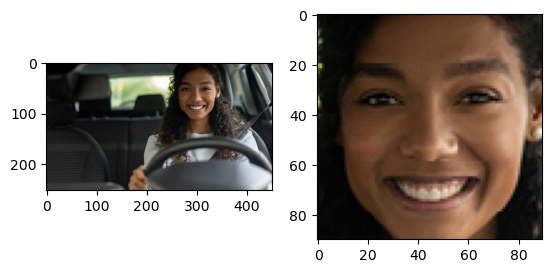

In [4]:
image = cv2.imread('image.jpg')
img,xywh = face_dedector(image)

plt.subplot(1,2,1)      
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
video_capture = cv2.VideoCapture(0)

night_mode = False

current_time = time.time()
last_time = time.time()
sonuc = ""

while True:
    ret, frame = video_capture.read()
    
    if (night_mode):
        frame = night_mode_apply(frame)
    
    face,coordinats = face_dedector(frame)
    if face is None:
        frame = cv2.putText(frame,
                      "yuz tespit edilemedi!",
                     (40, 450),
                     cv2.FONT_HERSHEY_SIMPLEX,
                     1,
                     (0,0,255),
                     2)
        try:
            cv2.destroyWindow("face")
        except:
            pass
    else:
        frame = cv2.putText(frame,
              "yuz tespit edildi",
             (40, 450),
             cv2.FONT_HERSHEY_SIMPLEX,
             1,
             (0,255,0),
             2)
        
        x = coordinats[0]
        y = coordinats[1]
        w = coordinats[2]
        h = coordinats[3]
        
        frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        
        #yüzü farklı bir pencerede gösterir
        #face = cv2.resize(face,(96,96))
        #cv2.imshow("face", face)
        
        
        #görüntü işleme
        
        
        
        
        # duygu tanıma
        
        current_time = time.time()
        if current_time - last_time >= 3:
            sonuc = emotion_recognition(image_proccesing(face))
            last_time = current_time
            
        frame = cv2.putText( 
                            frame,
                            str(sonuc),
                            (x, y-5),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.75,
                            (255,0,0),
                            2
                           ) 
    
    cv2.imshow('video',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

(1, 96, 96, 1)
1/1 [==============================] - 2s 2s/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.4337216e-26 3.2495304e-34]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 105ms/step
[[1.0000000e+00 2.2716086e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.4455250e-14 4.3685621e-30]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 100ms/step
[[9.6289349e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.1912955e-07 9.9999988e-01]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 97ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.8090017e-12]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 97ms/step
[[0.000000e+00 0.000000e+00 3.016252e-08 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 98ms/step
[[0.16470845 0.         0.         0.         0.         0.
  0.8352915 ]]
(1, 96, 96

(1, 96, 96, 1)
1/1 [==============================] - 0s 95ms/step
[[7.5680614e-01 1.6608091e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  5.2995913e-22 7.7112913e-02]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 92ms/step
[[6.8172417e-18 1.9435608e-12 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 1.9965293e-22]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 92ms/step
[[1.0000000e+00 1.5275875e-17 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.6795545e-29 2.4869713e-12]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 89ms/step
[[9.1300537e-21 3.4244786e-23 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 1.6228865e-09]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 90ms/step
[[0. 0. 0. 0. 0. 0. 1.]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 93ms/step
[[0.0000000e+00 2.4748702e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]
(1, 96, 96, 1)
1/1 [==============================] -

1/1 [==============================] - 0s 95ms/step
[[0. 0. 0. 0. 0. 0. 1.]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 102ms/step
[[0. 0. 0. 0. 0. 0. 1.]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 272ms/step
[[0.         0.         0.         0.         0.         0.07994235
  0.92005765]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 91ms/step
[[0. 0. 0. 0. 0. 0. 1.]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 91ms/step
[[0.000000e+00 0.000000e+00 5.898446e-37 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 92ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 94ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 95ms/step
[[1.0000000e+00 0.0000000e+00 3.8092336e-17 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
(1, 96, 96, 1)
1/1 [==============================] - 0s 94ms/step
[

In [6]:
face.shape

(166, 166, 3)

In [7]:
emotion_recognition(face)

ValueError: in user code:

    File "C:\Users\yusuf\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\yusuf\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yusuf\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\yusuf\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\yusuf\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\yusuf\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 96, 96, 1), found shape=(None, 166, 3)
